c:\Users\user\Desktop\FAN\CODESPACES\is-it-written-by-ai\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       200
           1       0.98      0.98      0.98       200

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



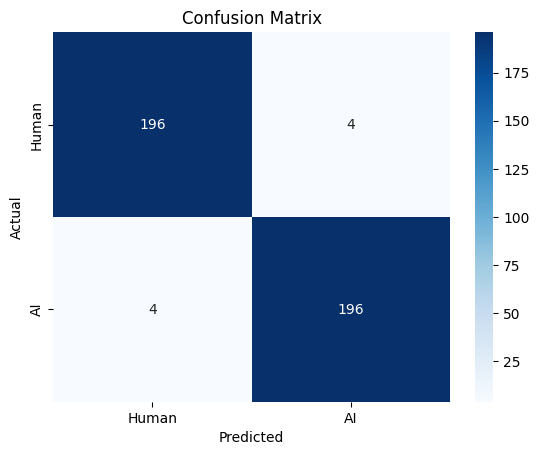

Model saved to: ..\models\baseline_model.pkl
Model saved to: ..\models\vectorizer.pkl


In [1]:
import sys
sys.path.append("..")

from src.config import Config
from src.data_loader import load_data, split_data, preprocess_tfidf
from src.model import train_baseline_model, evaluate_model, save_model

cfg = Config()

# Load and split data
df = load_data(cfg.processed_data_dir / "dataset.csv")
X_train, X_val, y_train, y_val = split_data(df, 0.4)

# TF-IDF Vectorization
X_train_tfidf, X_val_tfidf, vectorizer = preprocess_tfidf(X_train, X_val)

# Train model
model = train_baseline_model(X_train_tfidf, y_train)

# Evaluate
evaluate_model(model, X_val_tfidf, y_val)

# Save model
save_model(model, cfg.model_dir / "baseline_model.pkl")

# Save vectorizer
save_model(vectorizer, cfg.model_dir / "vectorizer.pkl")
